# Dataset
    Tahap pertama yang dilakukan untuk mengimplementasikan metode adalah mempersiapkan data terlebih dahulu

### 1. Membaca file json

In [495]:
import json

with open("dataset/data.json") as guci_dataset:
  dataset = json.load(guci_dataset)

print(dataset)

[{'pertanyaan': ["Assalamu'alaikum", "assalamu'alaikum wr.wb", "Assalamu'alaikum teman"], 'label': 'pembuka', 'jawaban': "wa'alaikumusallam wr. Wb, Apakah ada yang bisa kami bantu? tolong ketikan apa yang anda hendak kunjungi di objek wisata guci"}, {'pertanyaan': ['tiket masuk wisata guci', 'HTM wisata guci', 'tiket wisata guci', 'biaya wisata guci', 'Berapa tiket masuk wisata guci?', 'Harga tiket wisata guci hari libur?', 'Ada diskon tiket wisata guci?', 'Cara beli tiket wisata guci?', 'Tiket wisata guci rombongan berapa?', 'Tiket wisata guci keluarga ada?'], 'label': 'basic1', 'jawaban': 'harga tiket masuk guci pada hari biasa sebesar RP. 15.000/orang, jika hari libur harga tiket masuk guci sebesar Rp.20.000/orang, untuk tiket keluarga/rombongan ,dikalikan jumlah anggota rombongan, untuk pembelian tiket bisa langsung di lokasi,'}, {'pertanyaan': ['rekomendasi wisata terbaik di guci', 'apa saja wisata terbaik di guci', 'Tempat guci bagus?', 'Wisata air panas mana?', 'Objek wisata pop

### 2. Memecah data dari json ke variabel

In [496]:
datalist = []
jawaban = {}
for d in dataset:
    for p in d["pertanyaan"]:
        datalist.append({
            "inputs": p,
            "tags": d["label"],
        })
    jawaban[d["label"]] = d["jawaban"]

### 3. Memasukkan data ke dalam pandas DataFrame

In [497]:
import pandas as pd

dataset = pd.DataFrame(datalist)
dataset

,inputs,tags
0,Assalamu'alaikum,pembuka
1,assalamu'alaikum wr.wb,pembuka
2,Assalamu'alaikum teman,pembuka
3,tiket masuk wisata guci,basic1
4,HTM wisata guci,basic1
...,...,...
360,Lokasi Grand Dian mana?,lokasi27
361,Kolam renang grand dian?,lokasi27
362,Tiket masuk grand Dian?,lokasi27
363,Kamar suite grand dian berapa?,lokasi27


# Preprocessing
    Menyiapkan data agar dapat diproses oleh algoritma lebih baik, langka-langkahnya antara lain :

### 1. Tokenisasi
    Memecah teks menjadi unit-unit lebih kecil, dalam hal ini memisahkan setiap karakter termasuk spasi dan tanda baca

In [498]:
dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [ltrs for ltrs in sequence])
dataset

,inputs,tags
0,"[A, s, s, a, l, a, m, u, ', a, l, a, i, k, u, m]",pembuka
1,"[a, s, s, a, l, a, m, u, ', a, l, a, i, k, u, ...",pembuka
2,"[A, s, s, a, l, a, m, u, ', a, l, a, i, k, u, ...",pembuka
3,"[t, i, k, e, t, , m, a, s, u, k, , w, i, s, ...",basic1
4,"[H, T, M, , w, i, s, a, t, a, , g, u, c, i]",basic1
...,...,...
360,"[L, o, k, a, s, i, , G, r, a, n, d, , D, i, ...",lokasi27
361,"[K, o, l, a, m, , r, e, n, a, n, g, , g, r, ...",lokasi27
362,"[T, i, k, e, t, , m, a, s, u, k, , g, r, a, ...",lokasi27
363,"[K, a, m, a, r, , s, u, i, t, e, , g, r, a, ...",lokasi27


### 2. Cleaning
    Membersihkan simbol-simbol seperti tanda baca, tag-tag html dll

In [499]:
import string

dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [ltrs for ltrs in sequence if ltrs not in string.punctuation])
dataset

,inputs,tags
0,"[A, s, s, a, l, a, m, u, a, l, a, i, k, u, m]",pembuka
1,"[a, s, s, a, l, a, m, u, a, l, a, i, k, u, m, ...",pembuka
2,"[A, s, s, a, l, a, m, u, a, l, a, i, k, u, m, ...",pembuka
3,"[t, i, k, e, t, , m, a, s, u, k, , w, i, s, ...",basic1
4,"[H, T, M, , w, i, s, a, t, a, , g, u, c, i]",basic1
...,...,...
360,"[L, o, k, a, s, i, , G, r, a, n, d, , D, i, ...",lokasi27
361,"[K, o, l, a, m, , r, e, n, a, n, g, , g, r, ...",lokasi27
362,"[T, i, k, e, t, , m, a, s, u, k, , g, r, a, ...",lokasi27
363,"[K, a, m, a, r, , s, u, i, t, e, , g, r, a, ...",lokasi27


### 3. Case Folding
    Mengubah case semua huruf menjadi huruf kecil

In [500]:

dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [ltrs.lower() for ltrs in sequence])
dataset

,inputs,tags
0,"[a, s, s, a, l, a, m, u, a, l, a, i, k, u, m]",pembuka
1,"[a, s, s, a, l, a, m, u, a, l, a, i, k, u, m, ...",pembuka
2,"[a, s, s, a, l, a, m, u, a, l, a, i, k, u, m, ...",pembuka
3,"[t, i, k, e, t, , m, a, s, u, k, , w, i, s, ...",basic1
4,"[h, t, m, , w, i, s, a, t, a, , g, u, c, i]",basic1
...,...,...
360,"[l, o, k, a, s, i, , g, r, a, n, d, , d, i, ...",lokasi27
361,"[k, o, l, a, m, , r, e, n, a, n, g, , g, r, ...",lokasi27
362,"[t, i, k, e, t, , m, a, s, u, k, , g, r, a, ...",lokasi27
363,"[k, a, m, a, r, , s, u, i, t, e, , g, r, a, ...",lokasi27


In [501]:
dataset['inputs'] = dataset['inputs'].apply(lambda wrd: ''.join(wrd))
dataset

,inputs,tags
0,assalamualaikum,pembuka
1,assalamualaikum wrwb,pembuka
2,assalamualaikum teman,pembuka
3,tiket masuk wisata guci,basic1
4,htm wisata guci,basic1
...,...,...
360,lokasi grand dian mana,lokasi27
361,kolam renang grand dian,lokasi27
362,tiket masuk grand dian,lokasi27
363,kamar suite grand dian berapa,lokasi27


### 4. Stemming
    Yaitu mengubah setiap kata pada kalimat yang mengandung tambahan seperti awalan dan akhiran menjadi kata baku. dalam hal ini menggunakan library Sastrawi

In [502]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

dataset['inputs'] = dataset['inputs'].apply(lambda sequence: [stemmer.stem(word) for word in sequence.split()])
dataset

,inputs,tags
0,[assalamualaikum],pembuka
1,"[assalamualaikum, wrwb]",pembuka
2,"[assalamualaikum, teman]",pembuka
3,"[tiket, masuk, wisata, guci]",basic1
4,"[htm, wisata, guci]",basic1
...,...,...
360,"[lokasi, grand, dian, mana]",lokasi27
361,"[kolam, renang, grand, dian]",lokasi27
362,"[tiket, masuk, grand, dian]",lokasi27
363,"[kamar, suite, grand, dian, berapa]",lokasi27


### 5. Stop Word Removal
    Yaitu menghapus setiap kata hubung yang terdapat pada kalimat, dalam hal ini menggunakan fungsi lambda

In [503]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

stop_factory = StopWordRemoverFactory()
stop_tambahan = ["dengan", "ia","bahwa", "oleh"]
allstop = stop_factory.get_stop_words() + stop_tambahan
print(allstop)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [504]:
def stopword(word):
    if word in stop_tambahan:
        return ""
    else:
        return word

dataset['inputs'] = dataset['inputs'].apply(lambda words: " ".join([stopword(word) for word in words]))
dataset

,inputs,tags
0,assalamualaikum,pembuka
1,assalamualaikum wrwb,pembuka
2,assalamualaikum teman,pembuka
3,tiket masuk wisata guci,basic1
4,htm wisata guci,basic1
...,...,...
360,lokasi grand dian mana,lokasi27
361,kolam renang grand dian,lokasi27
362,tiket masuk grand dian,lokasi27
363,kamar suite grand dian berapa,lokasi27


# Transformasi
    Mentransformasikan huruf menjadi angka sehingga dapat diproses lebih baik oleh model, dalam hal ini menggunakan Tokenizer yang terdapat pada keras didalam library tensorflow untuk data input, dan LabelEncoder yang terdapat pada library Sklearn untuk data target / kelas / intent

### 1. Transformasi input

In [505]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(dataset['inputs'])
train = tokenizer.texts_to_sequences(dataset['inputs'])
print(tokenizer.word_index)

{'guci': 1, 'di': 2, 'wisata': 3, 'harga': 4, 'hotel': 5, 'tiket': 6, 'fasilitas': 7, 'ada': 8, 'informasi': 9, 'the': 10, 'apa': 11, 'kolam': 12, 'grand': 13, 'lokasi': 14, 'ashafana': 15, 'alam': 16, 'mana': 17, 'berapa': 18, 'air': 19, 'masuk': 20, 'renang': 21, 'mandi': 22, 'tempat': 23, 'panas': 24, 'buka': 25, 'kamar': 26, 'kafe': 27, 'forest': 28, 'foto': 29, 'mega': 30, 'onsen': 31, 'gulala': 32, 'keluarga': 33, 'barokah': 34, 'ta': 35, 'inap': 36, 'gung': 37, 'salma': 38, 'rindu': 39, 'spot': 40, 'serwiti': 41, 'geong': 42, 'graha': 43, 'tirta': 44, 'ayu': 45, 'kampung': 46, 'coffee': 47, 'on': 48, 'demand': 49, 'sabda': 50, 'rawamba': 51, 'dian': 52, 'saya': 53, 'sun': 54, 'q': 55, 'duta': 56, 'kencana': 57, 'jam': 58, 'joglo': 59, 'ageng': 60, 'villa': 61, 'baron': 62, 'hill': 63, 'golden': 64, 'park': 65, 'mulai': 66, 'hai': 67, 'gubug': 68, 'selter': 69, 'bantu': 70, 'cocok': 71, 'pancur': 72, '13': 73, 'curug': 74, 'shtepine': 75, 'baik': 76, 'aktivitas': 77, 'pandu': 78,

In [506]:
features = pad_sequences(train)
print(train)

[[89], [89, 127], [89, 128], [6, 20, 3, 1], [129, 3, 1], [6, 3, 1], [130, 3, 1], [18, 6, 20, 3, 1], [4, 6, 3, 1, 102, 131], [8, 132, 6, 3, 1], [133, 134, 6, 3, 1], [6, 3, 1, 135, 18], [6, 3, 1, 33, 8], [103, 3, 76, 2, 1], [11, 104, 3, 76, 2, 1], [23, 1, 105], [3, 19, 24, 17], [136, 3, 137], [23, 76, 138, 2, 1], [139, 140, 2, 1], [77, 90, 2, 1, 11], [141, 2, 1], [3, 19, 2, 1, 106, 142], [107], [84], [84, 108, 53, 143], [84, 8, 11, 2, 1], [107, 78, 1], [84, 1], [11, 85], [91, 85], [91, 102, 144], [145, 104], [91, 85, 2, 1], [146, 147, 148], [11, 149, 76], [150], [66], [151, 66], [86, 79, 152], [66, 153, 1], [3, 66, 154], [78, 109, 53], [66, 110, 2, 1], [53, 86, 66, 155], [3, 1, 66], [53, 87, 70], [80, 70, 53], [53, 87, 70], [8, 106, 108, 70], [80, 156, 53], [87, 78, 3], [157, 80, 70], [53, 158, 80], [87, 159, 3], [70, 109, 1], [67], [67, 11, 85], [67, 8, 11], [67, 1], [67, 86, 110], [67, 80, 78], [86, 79, 3], [67, 78, 3], [92, 93], [111], [160], [112], [113], [161, 92, 93], [53, 111], [1

In [507]:
print(features)

[[  0   0   0 ...   0   0  89]
 [  0   0   0 ...   0  89 127]
 [  0   0   0 ...   0  89 128]
 ...
 [  0   0   0 ...  20  13  52]
 [  0   0   0 ...  13  52  18]
 [  0   0   0 ... 101  13  52]]


In [508]:
import pickle

with open('output/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

### 2. Transformasi Target

In [509]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
labels = le.fit_transform(dataset['tags'])
for i in range(len(le.classes_)):
    print(f'{i} : {le.classes_[i]}')
print(labels)
np.save('output/classes.npy', le.classes_)

0 : basic1
1 : basic2
2 : basic3
3 : basic4
4 : basic5
5 : basic6
6 : basic7
7 : lokasi1
8 : lokasi10
9 : lokasi11
10 : lokasi12
11 : lokasi13
12 : lokasi14
13 : lokasi15
14 : lokasi16
15 : lokasi17
16 : lokasi18
17 : lokasi19
18 : lokasi2
19 : lokasi20
20 : lokasi21
21 : lokasi22
22 : lokasi23
23 : lokasi24
24 : lokasi25
25 : lokasi26
26 : lokasi27
27 : lokasi3
28 : lokasi4
29 : lokasi5
30 : lokasi6
31 : lokasi7
32 : lokasi8
33 : lokasi9
34 : pembuka
35 : penutup
[34 34 34  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2
  2  2  2  2  2  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5
  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6 35 35 35 35 35 35 35 35
 35 35 35  7  7  7  7  7  7  7  7  7  7 18 18 18 18 18 18 18 18 18 27 27
 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 30
 30 31 31 31 31 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32 32 33
 33 33 33 33 33 33 3

In [510]:
input_shape = features.shape[1]
print(input_shape)
print(features.shape)

8
(365, 8)


In [511]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  209
output length:  36


# Membagi data training dan data testing
Dataset akan dibagi menjadi data latih dan data uji untuk diproses pada pelatihan dan evaluasi

In [512]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=42)

In [513]:
y_train

array([31,  9, 24, 21, 29,  4, 25, 23, 33, 23,  1,  7, 30,  5, 35, 13, 21,
       34, 24, 26, 16, 14, 23,  0, 17,  4, 13,  9, 20,  9, 22,  4,  8,  9,
       11, 31,  9, 35, 10, 27,  1, 31, 18, 15,  2, 30, 26, 22,  1,  6, 11,
       16,  0,  5, 10, 20,  8, 25, 15, 23, 34, 30, 29, 13, 11, 19, 32, 10,
       21, 19,  6, 20,  5, 10, 26, 30, 14, 28, 24,  8, 10, 22, 33, 28,  1,
       12, 11, 25,  0, 10, 29, 25, 33, 28, 25, 20, 19, 29, 31, 21, 26, 29,
       17,  1, 33, 23, 15, 35, 13, 33, 11, 17, 20, 24, 17, 29, 20, 26, 29,
       14, 32, 14, 21, 17, 29, 10,  4, 26, 23, 10, 12, 35,  9,  1, 18, 27,
       11,  6, 15, 16, 12,  4,  0, 15, 19, 16, 17, 28, 29,  3,  8, 15, 11,
       35, 25,  2, 24, 15, 18, 33, 32, 13, 15, 29, 32, 26,  7, 21,  7, 27,
        6, 12, 31, 14, 32, 13,  0, 14, 27,  7, 26, 13, 30,  1,  9, 28, 22,
       33, 25, 25, 30, 19, 16, 24,  8, 23, 32, 35, 29, 31, 29,  9, 12, 12,
       18, 14, 25, 18, 18,  0,  8,  2, 22,  5,  7, 17,  8,  1, 19, 19,  7,
       31,  3, 21, 27,  5

In [514]:
y_test

array([24,  8, 31, 28, 31, 30, 17, 27, 33, 29, 13, 16, 29, 25, 34, 14,  1,
       10, 12, 25, 15, 16, 32, 18,  3, 20,  1, 22, 12, 27, 24, 10, 11,  0,
        4,  9, 18, 30, 29,  0, 13, 26, 32, 20,  7, 23,  4, 19,  9, 22,  5,
        5,  6, 23,  9,  6, 21, 14, 35, 17,  2, 31, 15,  7, 33, 29, 21, 35,
       19, 28,  8, 11, 26])

# Pelatihan
    Pada tahap ini, akan di implementasikan metode yang telah di susun dengan data yang telah dibersihkan

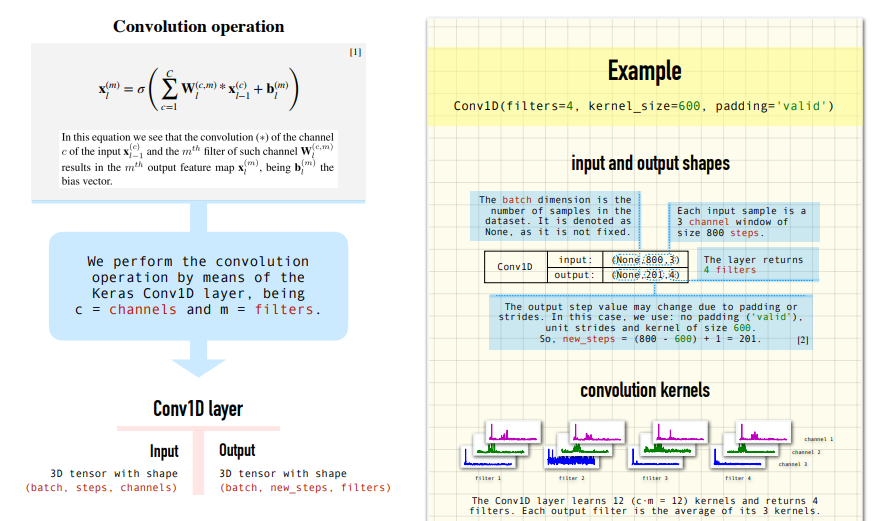

### 1. Inisialisasi Model

In [515]:
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalAveragePooling1D,Flatten, Dropout , GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D
import tensorflow as tf
import numpy as np
import random

tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

m = Sequential()
m.add(Input(shape=(features.shape[1],))) # mendeklarasikan layer input dengan jumlah kata terbanyak di data set berdasarkan fitur pada data set setelah dilakukan tokenizer(mengubah kata menjadi angka)
m.add(Embedding(vocabulary + 1,50))  
m.add(Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal(),bias_regularizer=tf.keras.regularizers.L2(0.0001), kernel_regularizer=tf.keras.regularizers.L2(0.0001), activity_regularizer = tf.keras.regularizers.L2(0.0001))) # shadow layer (konfolusi)
m.add(Dropout(0.3))
m.add(LSTM(32, dropout=0.3,return_sequences=True)) # shadow layer lstm 
m.add(LSTM(16, dropout=0.3,return_sequences=False)) # shadow layer lstm
m.add(Dense(128,activation="relu", activity_regularizer = tf.keras.regularizers.L2(0.0001))) 
m.add(Dropout(0.6))
m.add(Dense(output_length, activation="softmax", activity_regularizer = tf.keras.regularizers.L2(0.0001)))

In [516]:
m.layers

### 2. Implementasi Word Embedding
    Word embeddings adalah proses konversi kata yang berupa karakter alphanumeric kedalam bentuk vector, ini di implementasikan bersama layer pada RNN

In [517]:
glove_dir = "glove/glove_50dim_wiki.id.case.text.txt"
embeddings_index = {}
file_ = open(glove_dir, encoding="utf8")
for line in file_:
    arr = line.split()
    single_word = arr[0]
    w = np.asarray(arr[1:],dtype='float32')
    embeddings_index[single_word] = w
file_.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 370013 word vectors.


In [518]:
max_words = vocabulary + 1
word_index = tokenizer.word_index
# X_train = features
# y_train = labels
embedding_matrix = np.zeros((max_words,50)).astype(object)
for word , i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
#X_test = features 
#y_test = labels

In [519]:
m.layers[0].set_weights([embedding_matrix])
m.layers[0].trainable = False

In [520]:
m.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [521]:
m.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 8, 50)             10500     
                                                                 
 conv1d_13 (Conv1D)          (None, 4, 32)             8032      
                                                                 
 dropout_26 (Dropout)        (None, 4, 32)             0         
                                                                 
 lstm_26 (LSTM)              (None, 4, 32)             8320      
                                                                 
 lstm_27 (LSTM)              (None, 16)                3136      
                                                                 
 dense_26 (Dense)            (None, 128)               2176      
                                                                 
 dropout_27 (Dropout)        (None, 128)             

In [522]:
from keras.callbacks import TensorBoard, EarlyStopping
earlyStopping = EarlyStopping(monitor = 'loss', patience = 400, mode = 'min', restore_best_weights = True)

### 3. Menjalankan Pelatihan

In [523]:
history_training = m.fit(X_train,y_train,epochs=2000, batch_size=64, callbacks=[earlyStopping], shuffle=False)

Epoch 1/2000
5/5 [==============================] - 29s 58ms/step - loss: 3.5916 - accuracy: 0.0274
Epoch 2/2000
5/5 [==============================] - 0s 42ms/step - loss: 3.5879 - accuracy: 0.0137
Epoch 3/2000
5/5 [==============================] - 0s 33ms/step - loss: 3.5849 - accuracy: 0.0479
Epoch 4/2000
5/5 [==============================] - 0s 33ms/step - loss: 3.5815 - accuracy: 0.0411
Epoch 5/2000
5/5 [==============================] - 0s 39ms/step - loss: 3.5812 - accuracy: 0.0308
Epoch 6/2000
5/5 [==============================] - 0s 33ms/step - loss: 3.5786 - accuracy: 0.0445
Epoch 7/2000
5/5 [==============================] - 0s 36ms/step - loss: 3.5750 - accuracy: 0.0411
Epoch 8/2000
5/5 [==============================] - 0s 32ms/step - loss: 3.5723 - accuracy: 0.0616
Epoch 9/2000
5/5 [==============================] - 0s 37ms/step - loss: 3.5648 - accuracy: 0.0548
Epoch 10/2000
5/5 [==============================] - 0s 37ms/step - loss: 3.5600 - accuracy: 0.0753
Epoch 11

### 4. Visualisasi Hasil Pelatihan

In [524]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw_plot(data, type_data):
  # mpl.style.use('seaborn')
  plt.figure(figsize = (25, 5))
  plt.plot(data,'darkorange', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

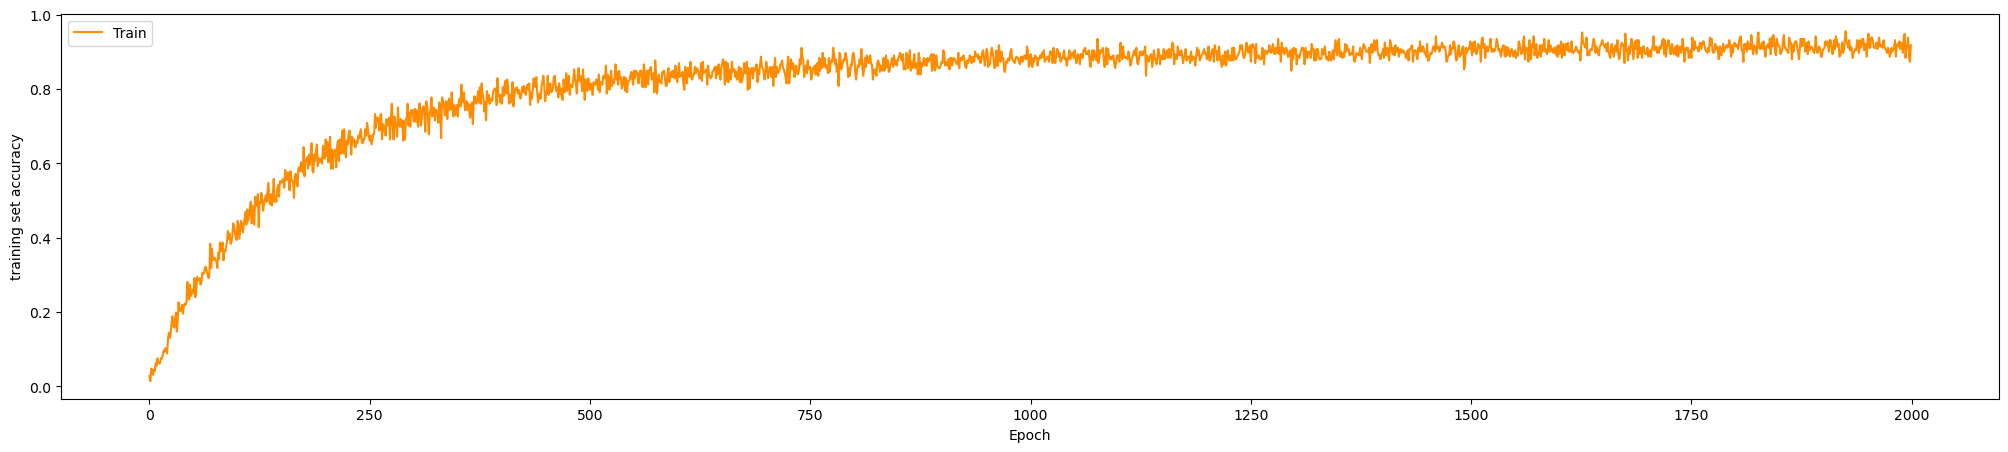

In [525]:
draw_plot(history_training.history['accuracy'],'training set accuracy' )

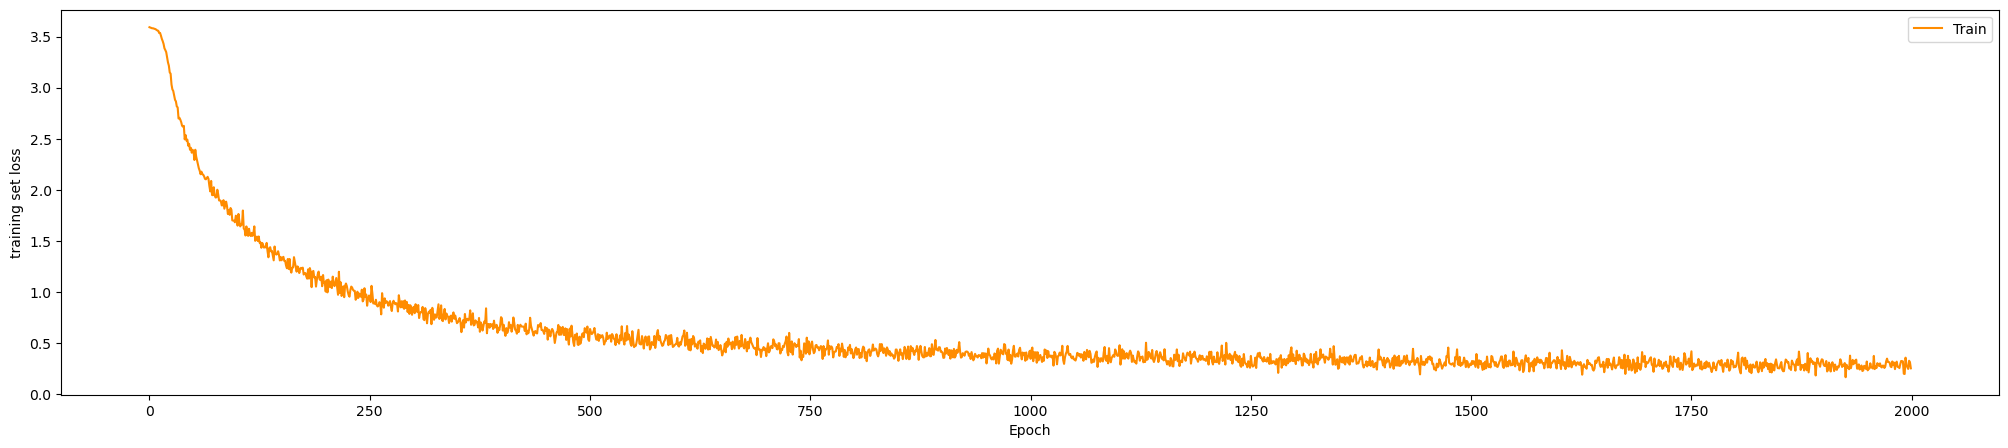

In [526]:
draw_plot(history_training.history['loss'],'training set loss' )

# Evaluasi

In [527]:
y_pred = m.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
Truefalse =[]
tp = 0
fp = 0
tn = 0
fn = 0
for idx in range(len(y_pred)):
    Truefalse.append(y_test[idx] == y_pred[idx])
    if (y_test[idx] == y_pred[idx]):
        tp = tp + (y_pred[idx] > 17)
        tn = tn + (y_pred[idx] < 18)
    else:
        fp = fp + (y_pred[idx] > 17)
        fn = fn + (y_pred[idx] < 18)
print(y_test, y_pred,Truefalse)
print(f'TP : {tp} -- TN : {tn} -- FP : {fp} -- FN : {fn}')
m.evaluate(X_test, y_test, batch_size = 64)

3/3 [==============================] - 5s 8ms/step
[24  8 31 28 31 30 17 27 33 29 13 16 29 25 34 14  1 10 12 25 15 16 32 18
  3 20  1 22 12 27 24 10 11  0  4  9 18 30 29  0 13 26 32 20  7 23  4 19
  9 22  5  5  6 23  9  6 21 14 35 17  2 31 15  7 33 29 21 35 19 28  8 11
 26] [24  8 29 28 31 30 33 27  7 29 13 22 29 13 34 14  1 10 12 12 15  8 32 18
  3 20  0 33 30 27 24 16 11  0  0  9 18 30 29 26 13 26 32 20  7 23  5 19
  9 25  0  5  6 23  9  6 21 14 35 17 30 27 15  7 33 29 21 35 19 28  8 11
 26] [True, True, False, True, True, True, False, True, False, True, True, False, True, False, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, True, True, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, False, True, True, False, False, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True]
TP : 31 -- TN : 24 -- FP : 9 -- FN : 9
2/2 [

[2.462764263153076, 0.7534246444702148]

# Simpan Model

In [528]:
m.save("output/guci.keras")

# Contoh Penggunaan Model

In [529]:
encoder = LabelEncoder()
encoder.classes_ = np.load('output/classes.npy', allow_pickle=True)
print(encoder.classes_)

['basic1' 'basic2' 'basic3' 'basic4' 'basic5' 'basic6' 'basic7' 'lokasi1'
 'lokasi10' 'lokasi11' 'lokasi12' 'lokasi13' 'lokasi14' 'lokasi15'
 'lokasi16' 'lokasi17' 'lokasi18' 'lokasi19' 'lokasi2' 'lokasi20'
 'lokasi21' 'lokasi22' 'lokasi23' 'lokasi24' 'lokasi25' 'lokasi26'
 'lokasi27' 'lokasi3' 'lokasi4' 'lokasi5' 'lokasi6' 'lokasi7' 'lokasi8'
 'lokasi9' 'pembuka' 'penutup']


In [530]:
import random
def generate_answer(query):
  texts = []
  pred_input = query
  pred_input = [letters.lower() for letters in pred_input if letters not in string.punctuation]
  pred_input = ''.join(pred_input)
  texts.append(pred_input)
  print(pred_input)
  pred_input = tokenizer.texts_to_sequences(texts)
  print(pred_input)
  pred_input = np.array(pred_input).reshape(-1)
  print(pred_input)
  pred_input = pad_sequences([pred_input],input_shape)
  print(pred_input)
  output = m.predict(pred_input)
  output = output.argmax()
  response_tag = encoder.inverse_transform([output])[0]
  print(response_tag)
  return random.choice(jawaban[response_tag])

In [531]:
list_que = ["gulala","penginapan kampung guci ?","hallo", "HTM"]
for i in list_que:
  print("you: {}".format(i))
  res_tag = generate_answer(i)
  print(res_tag)  

you: gulala
gulala
[[32]]
[32]
[[ 0  0  0  0  0  0  0 32]]
1/1 [==============================] - 0s 66ms/step
pembuka
 
you: penginapan kampung guci ?
penginapan kampung guci 
[[46, 1]]
[46  1]
[[ 0  0  0  0  0  0 46  1]]
1/1 [==============================] - 0s 66ms/step
lokasi17
u
you: hallo
hallo
[[107]]
[107]
[[  0   0   0   0   0   0   0 107]]
1/1 [==============================] - 0s 83ms/step
basic3
 
you: HTM
htm
[[129]]
[129]
[[  0   0   0   0   0   0   0 129]]
1/1 [==============================] - 0s 66ms/step
basic1
b


In [532]:
query2 = "hallo"
print(query2)
texts2 = []
pred_input2 = query2
pred_input2 = [letters.lower() for letters in pred_input2 if letters not in string.punctuation]
pred_input2 = ''.join(pred_input2)
texts2.append(pred_input2)
with open('output/tokenizer.pickle', 'rb') as handle:
    tokenizer2 = pickle.load(handle)
print(pred_input2)
pred_input2 = tokenizer2.texts_to_sequences(texts2)
print(pred_input2)
pred_input2 = np.array(pred_input2).reshape(-1)
print(pred_input2)
pred_input2 = pad_sequences([pred_input2],8)
print(pred_input2)
m2 = tf.keras.models.load_model('output/guci.keras')
output2 = m2.predict(pred_input2)
output2 = output2.argmax()

le2 = LabelEncoder()
le2.classes_ = np.load('output/classes.npy', allow_pickle=True)
le2.classes_

response_tag2 = le2.inverse_transform([output2])[0]
print(response_tag2)
with open("dataset/guci_intent.json") as guci_dataset:
    dataset2 = json.load(guci_dataset)

# [tags2, inputs2, responses2] = processing_json_dataset(dataset2)

# print({"answer": random.choice(responses2[response_tag2])})

hallo
hallo
[[107]]
[107]
[[  0   0   0   0   0   0   0 107]]
1/1 [==============================] - 5s 5s/step
basic3
